In [1]:
# general purpose python
import collections
import datetime
import glob
import importlib
import itertools
import json
import math
import os
import pickle
import random
import re
import shutil
import sys
import time
import warnings

# general purpose data science
import IPython
import ipywidgets as ipw
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

# computer vision
import cv2
import imageio
import PIL
from PIL import *

# deep learning
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

# geospatial
import rasterio as rio
import rasterio.features

warnings.filterwarnings('ignore')

np.random.seed(1337)

mpl.rcParams['figure.dpi'] = 400

IPython.core.display.display(IPython.core.display.HTML("<style>.container { width:100% !important; }</style>"))

pd.options.display.max_colwidth = 32
pd.options.display.float_format = '{:,.6f}'.format
pd.options.display.expand_frame_repr = False

%matplotlib inline

sns.set(font_scale=1.3)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

plotly.offline.init_notebook_mode(connected=True)
plotly.io.templates.default = 'plotly_white'

In [2]:
data_dir = '../../data/movielens/'

## Movies

In [3]:
movies = pd.read_csv(f'{data_dir}/movies_clean.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              27278 non-null  int64  
 1   title                 27278 non-null  object 
 2   year                  27256 non-null  float64
 3   parsed_genres         27278 non-null  object 
 4   genre_children        27278 non-null  int64  
 5   genre_musical         27278 non-null  int64  
 6   genre_animation       27278 non-null  int64  
 7   genre_action          27278 non-null  int64  
 8   genre_western         27278 non-null  int64  
 9   genre_fantasy         27278 non-null  int64  
 10  genre_horror          27278 non-null  int64  
 11  genre_scifi           27278 non-null  int64  
 12  genre_crime           27278 non-null  int64  
 13  genre_adventure       27278 non-null  int64  
 14  genre_romance         27278 non-null  int64  
 15  genre_comedy       

In [4]:
movies.sample(10).T

,1877,25233,9187,22618,25252,25382,23159,6017,24133,7139
movie_id,1961,119051,27074,108332,119139,119948,110366,6116,114417,7251
title,Rain Man (1988),Crime at the Chinese Restaur...,Brave New World (1998),"Mystery of the Yellow Room, ...",Ascension (2014),Let's Kill Ward's Wife (2014),Jean-Michel Basquiat: The Ra...,"Pirate Movie, The (1982)","Average Little Man, An (Un b...",Where the Day Takes You (1992)
year,"1,988.000000","1,981.000000","1,998.000000","2,003.000000","2,014.000000","2,014.000000","2,010.000000","1,982.000000","1,977.000000","1,992.000000"
parsed_genres,['drama'],"['comedy', 'mystery', 'thril...",['scifi'],"['comedy', 'crime', 'mystery']","['drama', 'scifi']",['comedy'],['documentary'],"['adventure', 'comedy', 'mus...",['drama'],['drama']
genre_children,0,0,0,0,0,0,0,0,0,0
genre_musical,0,0,0,0,0,0,0,1,0,0
genre_animation,0,0,0,0,0,0,0,0,0,0
genre_action,0,0,0,0,0,0,0,0,0,0
genre_western,0,0,0,0,0,0,0,0,0,0
genre_fantasy,0,0,0,0,0,0,0,0,0,0


In [5]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
movie_id,"27,278.000000","59,855.480570","44,429.314697",1.000000,"6,931.250000","68,068.000000","100,293.250000","131,262.000000"
year,"27,256.000000","1,989.371551",23.335631,"1,891.000000","1,976.000000","1,998.000000","2,008.000000","2,015.000000"
genre_children,"27,278.000000",0.041755,0.200033,0.000000,0.000000,0.000000,0.000000,1.000000
genre_musical,"27,278.000000",0.037979,0.191150,0.000000,0.000000,0.000000,0.000000,1.000000
genre_animation,"27,278.000000",0.037649,0.190350,0.000000,0.000000,0.000000,0.000000,1.000000
genre_action,"27,278.000000",0.129042,0.335252,0.000000,0.000000,0.000000,0.000000,1.000000
genre_western,"27,278.000000",0.024782,0.155463,0.000000,0.000000,0.000000,0.000000,1.000000
genre_fantasy,"27,278.000000",0.051763,0.221553,0.000000,0.000000,0.000000,0.000000,1.000000
genre_horror,"27,278.000000",0.095718,0.294210,0.000000,0.000000,0.000000,0.000000,1.000000
genre_scifi,"27,278.000000",0.063898,0.244575,0.000000,0.000000,0.000000,0.000000,1.000000


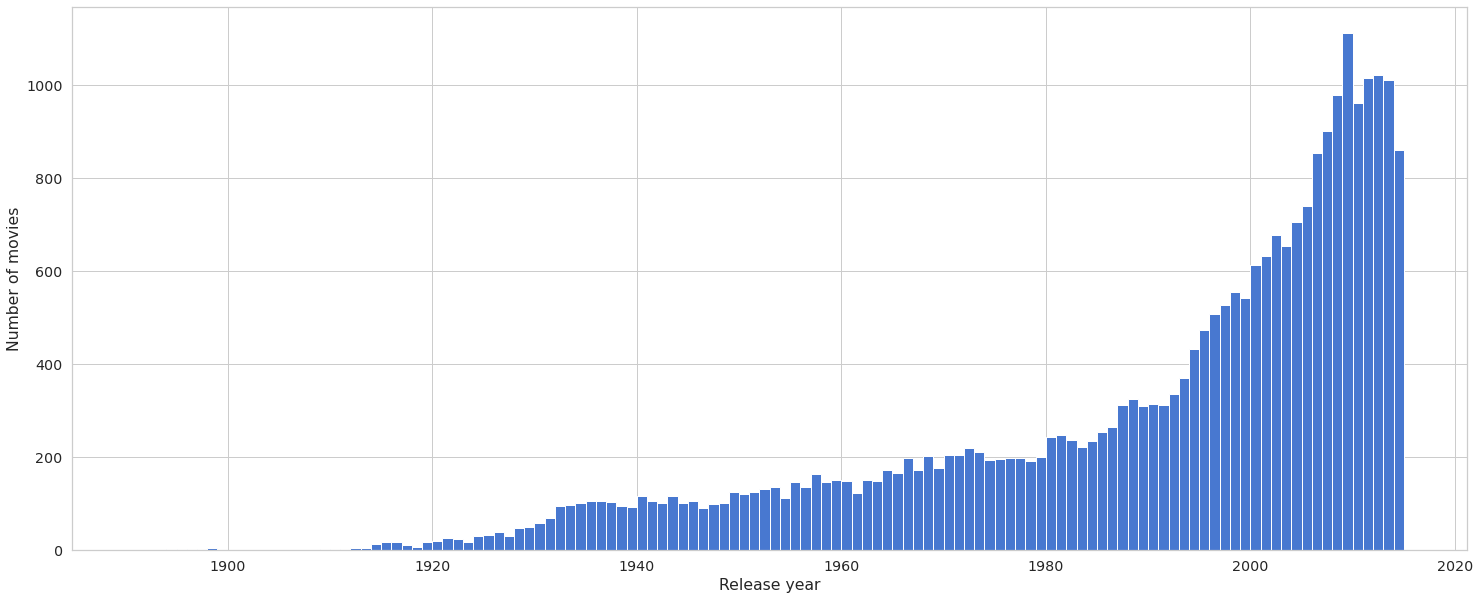

In [6]:
plt.figure(figsize=(25, 10))
years = movies.year.dropna().tolist()
bins = int(np.max(years) - np.min(years))
plt.hist(years, bins=bins)
plt.xlabel('Release year')
plt.ylabel('Number of movies')
plt.show()

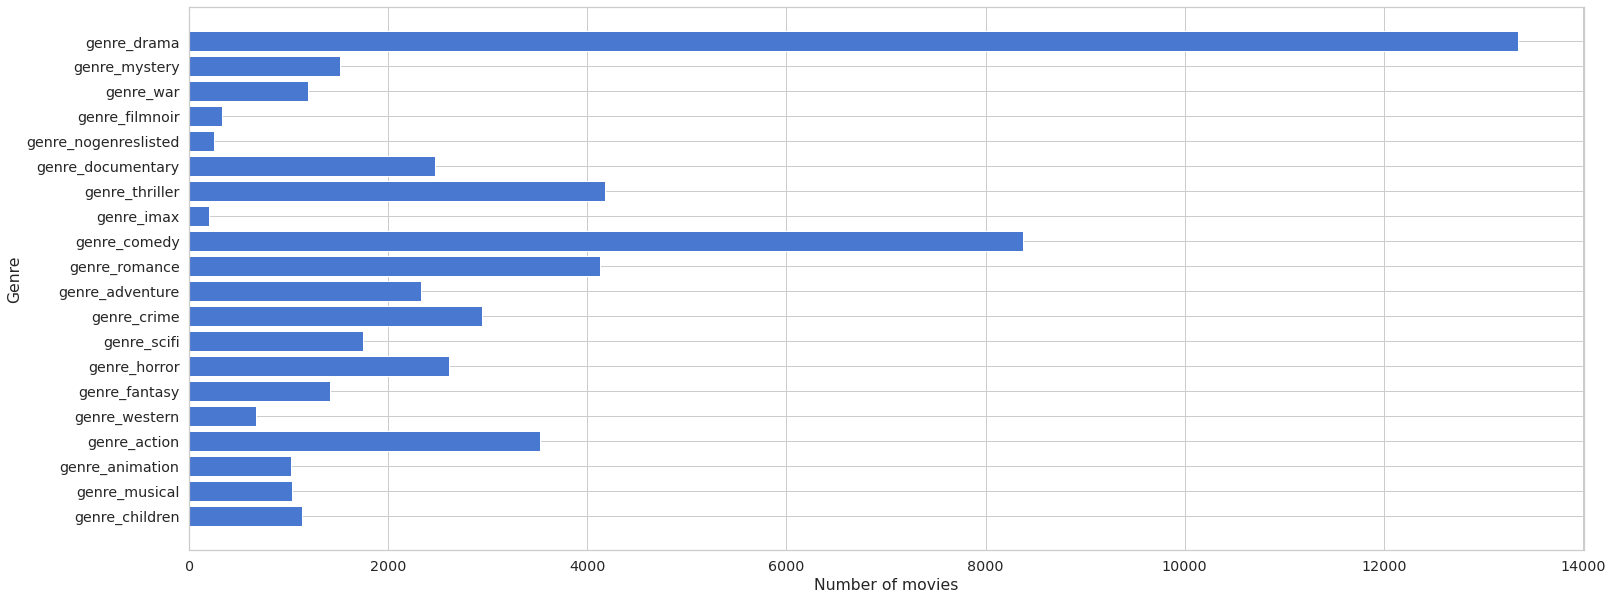

In [7]:
genre_cols = [col for col in movies.columns if col.startswith('genre_')]
genre_counts = movies.sum()[genre_cols]
plt.figure(figsize=(25, 10))
plt.barh(genre_counts.index, width=genre_counts.values)
plt.xlabel('Number of movies')
plt.ylabel('Genre')
plt.show()

## Tags

In [8]:
tags = pd.read_csv(f'{data_dir}/tags_clean.csv')
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    465564 non-null  int64 
 1   movie_id   465564 non-null  int64 
 2   tag        465548 non-null  object
 3   timestamp  465564 non-null  int64 
 4   year       465564 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 17.8+ MB


In [9]:
tags.sample(10)

,user_id,movie_id,tag,timestamp,year
56826,11248,97752,multiple storylines,1355438408,2012
442181,130827,38824,traumatic childhood,1227626017,2008
36710,9815,1343,serial killer,1400935071,2014
114935,28599,94150,based on a true story,1394668108,2014
329673,97198,3527,classic,1311157805,2011
393226,122523,26082,realistic action,1420576822,2015
86252,22074,48780,Scarlett Johansson,1368850974,2013
53707,11081,8507,TREACHEROUS SPOUSES,1172502842,2007
58579,12271,4621,John Travolta,1165704878,2006
138307,38615,1206,Nudity (Topless - Brief),1205616101,2008


In [10]:
tags.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,"465,564.000000","68,712.354263","41,877.674053",18.000000,"28,780.000000","70,201.000000","107,322.000000","138,472.000000"
movie_id,"465,564.000000","32,627.762920","36,080.241157",1.000000,"2,571.000000","7,373.000000","62,235.000000","131,258.000000"
timestamp,"465,564.000000","1,298,711,076.342857","79,208,912.595112","1,135,429,210.000000","1,245,007,262.500000","1,302,291,181.000000","1,366,217,861.250000","1,427,771,352.000000"
year,"465,564.000000","2,010.697737",2.500639,"2,005.000000","2,009.000000","2,011.000000","2,013.000000","2,015.000000"


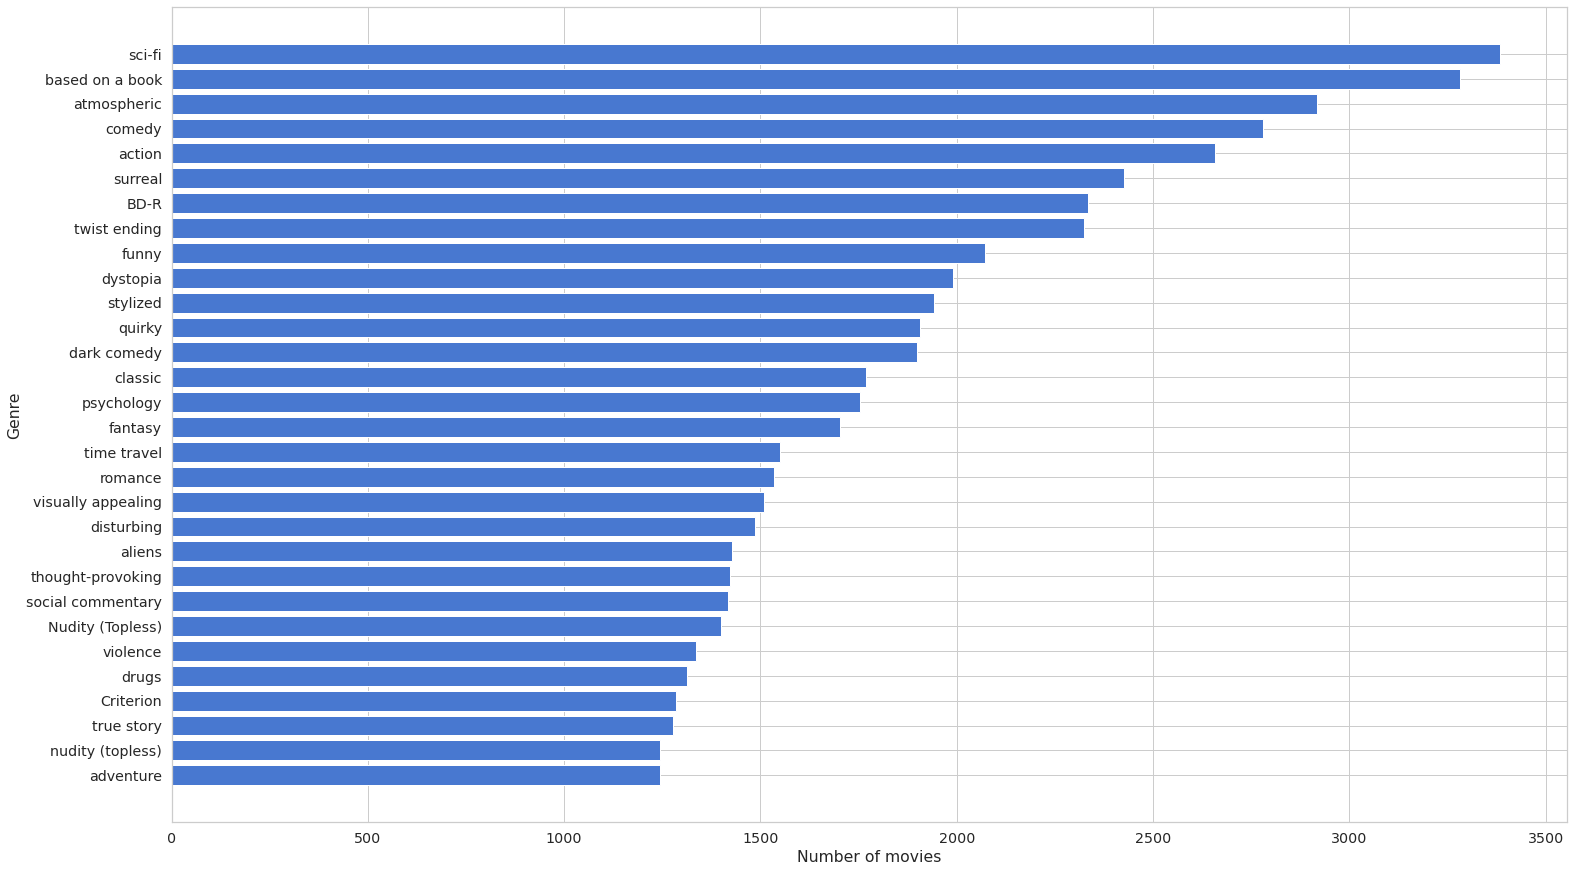

In [11]:
tag_counts = tags.tag.value_counts()[:30][::-1]
plt.figure(figsize=(25, 15))
plt.barh(tag_counts.index, width=tag_counts.values)
plt.xlabel('Number of movies')
plt.ylabel('Genre')
plt.show()

## Ratings

In [12]:
ratings = pd.read_csv(f'{data_dir}/ratings_clean.csv')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user_id    int64  
 1   movie_id   int64  
 2   rating     float64
 3   timestamp  int64  
 4   year       int64  
dtypes: float64(1), int64(4)
memory usage: 762.9 MB


In [13]:
ratings.sample(10)

,user_id,movie_id,rating,timestamp,year
5811064,40008,2959,4.000000,1231036229,2009
2895131,19630,1472,3.000000,945068532,1999
15624435,108063,4235,5.000000,1170622829,2007
14179476,97891,292,3.000000,1233752577,2009
14113568,97491,594,3.000000,1102513683,2004
6937387,47816,708,3.500000,1096917985,2004
4668987,32053,3827,3.000000,1035986204,2002
2568462,17404,1909,3.000000,1249324050,2009
18110383,125268,2734,1.000000,943456957,1999
14339942,99067,3111,3.000000,986016633,2001


In [14]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,"20,000,263.000000","69,045.872583","40,038.626653",1.000000,"34,395.000000","69,141.000000","103,637.000000","138,493.000000"
movie_id,"20,000,263.000000","9,041.567330","19,789.477445",1.000000,902.000000,"2,167.000000","4,770.000000","131,262.000000"
rating,"20,000,263.000000",3.525529,1.051989,0.500000,3.000000,3.500000,4.000000,5.000000
timestamp,"20,000,263.000000","1,100,917,921.677018","162,169,424.782724","789,652,004.000000","966,797,745.000000","1,103,555,886.000000","1,225,642,317.500000","1,427,784,002.000000"
year,"20,000,263.000000","2,004.379117",5.176982,"1,995.000000","2,000.000000","2,004.000000","2,008.000000","2,015.000000"


count   20,000,263.000000
mean             3.525529
std              1.051989
min              0.500000
25%              3.000000
50%              3.500000
75%              4.000000
max              5.000000
Name: rating, dtype: float64


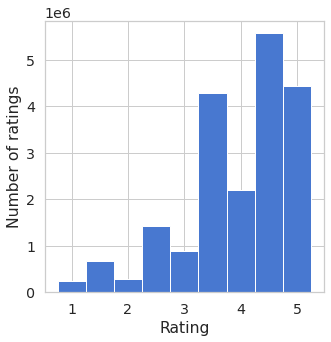

In [15]:
print(ratings.rating.describe())
plt.figure(figsize=(5, 5))
plt.hist(ratings.rating, bins=9, align='right')
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.show()

count   26,744.000000
mean       747.841123
std      3,085.818268
min          1.000000
50%         18.000000
75%        205.000000
90%      1,305.700000
95%      3,612.950000
99%     14,388.690000
99.9%   41,460.952000
max     67,310.000000
Name: movie_id, dtype: float64


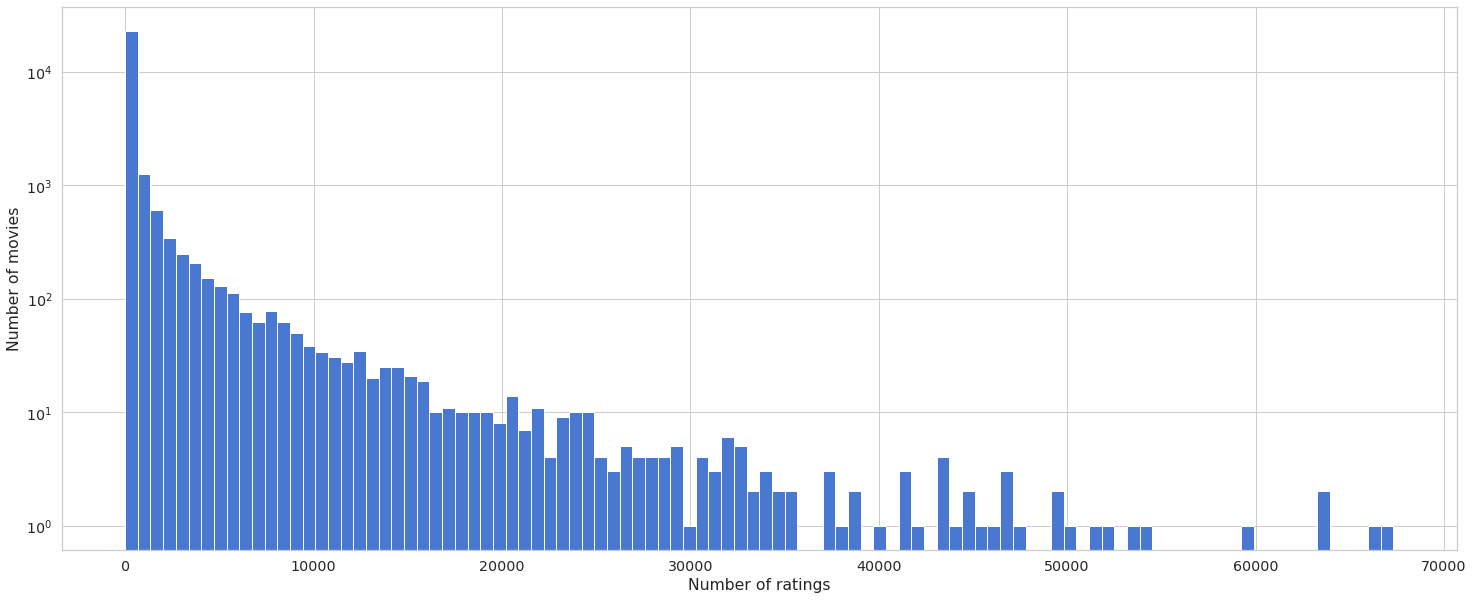

In [16]:
n_ratings = ratings.groupby(['movie_id']).movie_id.count()
print(n_ratings.describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99, 0.999]))
plt.figure(figsize=(25, 10))
plt.hist(n_ratings, bins=100)
plt.yscale('log')
plt.xlabel('Number of ratings')
plt.ylabel('Number of movies')
plt.show()

count   138,493.000000
mean        144.413530
std         230.267257
min          20.000000
50%          68.000000
75%         155.000000
90%         334.000000
95%         520.000000
99%       1,113.080000
99.9%     2,363.080000
max       9,254.000000
Name: movie_id, dtype: float64


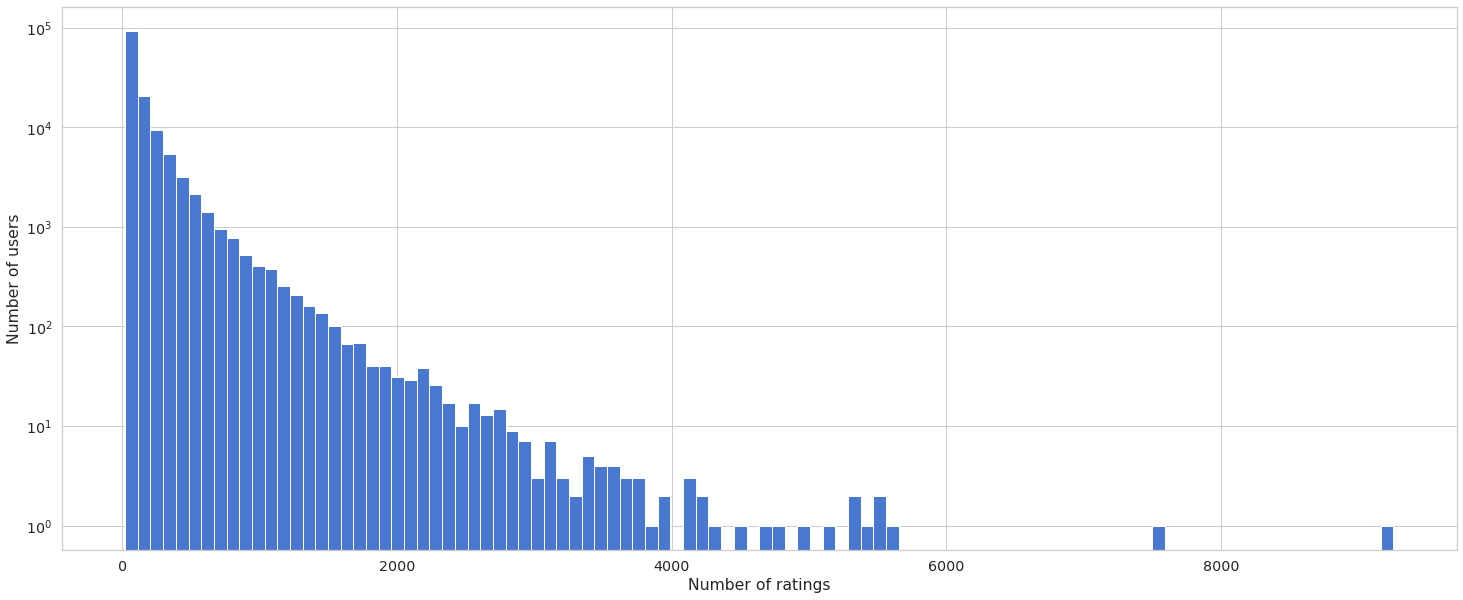

In [17]:
n_ratings = ratings.groupby(['user_id']).movie_id.count()
print(n_ratings.describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99, 0.999]))
plt.figure(figsize=(25, 10))
plt.hist(n_ratings, bins=100)
plt.yscale('log')
plt.xlabel('Number of ratings')
plt.ylabel('Number of users')
plt.show()

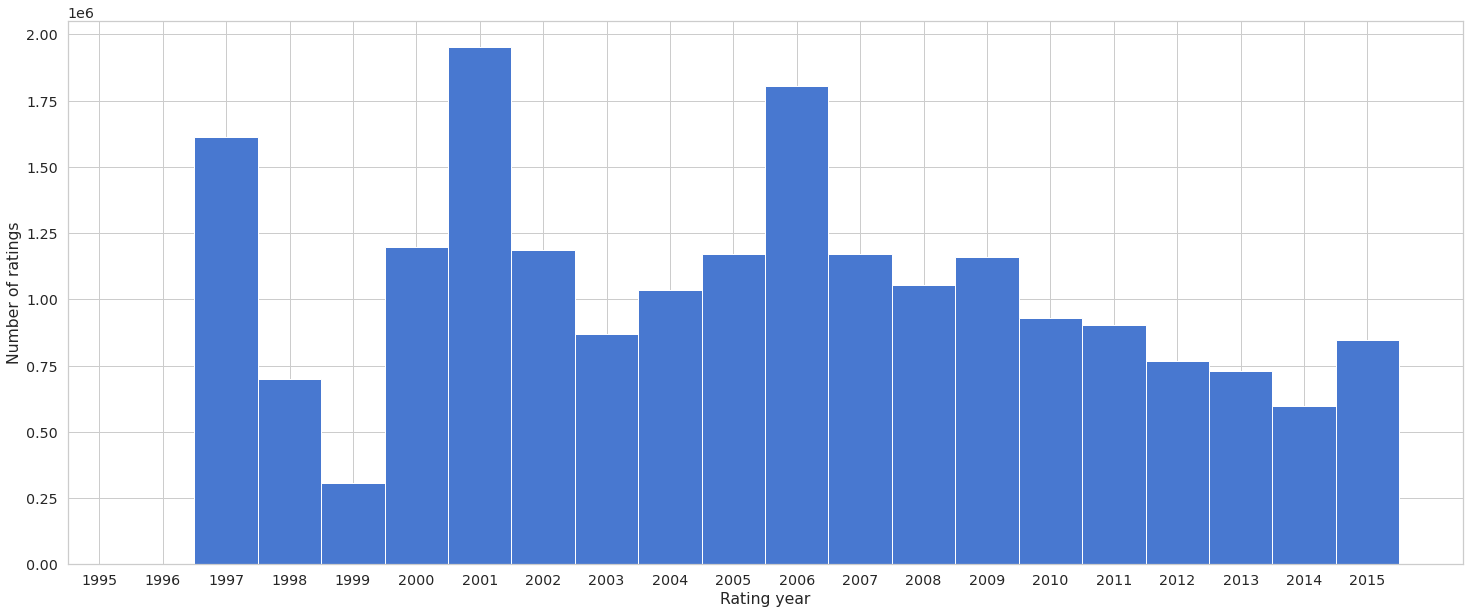

In [18]:
plt.figure(figsize=(25, 10))
years = ratings.year.dropna().astype(int).tolist()
bins = int(np.max(years) - np.min(years))
plt.hist(years, bins=bins, align='right')
plt.xlabel('Rating year')
plt.ylabel('Number of ratings')
plt.xticks(range(1995, 2016))
plt.show()